## Reconhecimento Facial com Machine Learning utilizando SVM e PCA

![title](img/Reconhecimento-facial-ilustracao.png)

### Definição do problema
Essa abordagem trata o reconhecimento de face como um problema de reconhecimento bidimensional, aproveitando o fato de que as faces normalmente estão na posição vertical e, portanto, podem ser descritas por um conjunto de características 2D. As imagens de rosto são projetadas em um espaço de recurso ('espaço de rosto') que melhor codifica a vvariação entre imagens de rosto conhecidas.

O PCA/Principal Component Analysis foi inventado em 1901 por Karl Pearson e utiliza álgebra linear para transformar datasets em um forma comprimida, o que é geralmente conhecido com Redução de Dimensonalidade.

In [2]:
# Carregando os pacotes

# Armazenamento das imagens
import numpy as np

# Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import svm

# Imagens
from sklearn import datasets

# Criação dos gráficos
import matplotlib.pyplot as plt
%matplotlib inline

### Informações sobre o Dataset utilizado:
Usarei um dataset famoso para tarefas de reconhecimento facial, este dataset está disponível publicamente. 
O nome do Dataset é <b>Labeled Faces in the Wild Home</b>, contém mais de 13.000 imagens de rostos coletados da web. Cada rosto foi etiquetado com o nome da pessoa retratada.
O Dataset pode ser baixado em: http://vis-www.cs.umass.edu/lfw/http://vis-www.cs.umass.edu/lfw/.

#### Carregando o Dataset

In [5]:
# Download do dataset  é feito em tempo de execução, então utilizaremos o mínimo ded 70 imagens por pessoa,
# com o fator de redimensionamento de 0.4.
dataset_faces = datasets.fetch_lfw_people(min_faces_per_person=70, resize = 0.4)

In [7]:
# Dimensões do Dataset
dataset_faces.data.shape

(1288L, 1850L)

In [8]:
# Visualizando as imagens
dataset_faces.data

array([[254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
         86.666664],
       [ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
        133.66667 ],
       [ 89.333336, 104.      , 126.      , ..., 175.33333 , 183.33333 ,
        183.      ],
       ...,
       [ 86.      ,  80.333336,  74.666664, ...,  44.      ,  49.666668,
         44.666668],
       [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
        166.33333 ],
       [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
         61.      ]], dtype=float32)

In [9]:
# Quantidade de faces no Dataset
len(dataset_faces.data[0])

1850

Ná célula referida "Visualizando as imagens", você só viu números ao invés das imagens, certo? 
Para a máquina, as imagens são representações numéricas, são matrizes de pixels, onde cada pixel representa uma tonalidade de cor. Várioss pixels juntos formam uma bela imagem.

#### Preparando o Dataset

In [12]:
# Extraindo os detalhes do formato das imagens
num_amostras, altura, largura = dataset_faces.images.shape

In [13]:
# Número de imagens contidas no Dataset
num_amostras

1288L

In [14]:
# Altura de cada imagem em pixels
altura

50L

In [15]:
# Largura de cada imagem em pixels
largura

37L

Há nesse Dataset 1288 imagens, cada uma com dimensões 50 x 37 pixels.

In [16]:
# Colocamos data em X(variáveis explicativas ou variáveis de entrada) e target em y (variável alvo ou variável de saída)
X = dataset_faces.data

In [17]:
# Número de atributos de X/quantidade de colunas explicativas
num_atributos = X.shape[1]
num_atributos

1850L

O valor 1850 é resultante da multiplicação da largura e altura em pixels. Este valor representa variáveis do dataset, cada variável representa um pixel.

In [19]:
print(X)

[[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]


Cada pixel pode assumir um valor de 0 a 255, para imagens em preto e branco.

In [20]:
# target/variável alvo
y = dataset_faces.target

In [21]:
# Extraindo nome das classes
target_names = dataset_faces.target_names

In [25]:
# Vejamos quantas classes temos
num_classes = target_names.shape[0]
num_classes

7L

O número 7 representa o número de pessoas que temos no dataset, ou seja, temos fotos de 7 pessoas diferentes.

In [23]:
print(y)

[5 6 3 ... 5 3 5]


In [26]:
# Resumo dos dados
print("\nTamanho Total do Dataset: \n")
print("Número de Amostras: %d" % num_amostras)
print("Número de Atributos: %d" % num_atributos)
print("Número de Classes: %d" % num_classes)


Tamanho Total do Dataset: 

Número de Amostras: 1288
Número de Atributos: 1850
Número de Classes: 7


#### Visualizando as imagens gráficamente

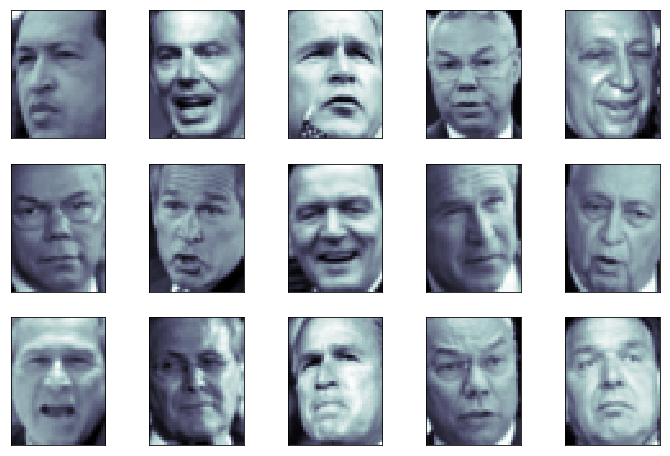

In [28]:
# Definindo o tamanho da área de plotagem
fig = plt.figure(figsize=(12, 8))

# Plot de 15 imagens
for i in range(15):
    # Dividindo a área total de plotagem em subplots, com 5 colunas e 3 linhas
    ax = fig.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
    # Plotando as imagens
    ax.imshow(dataset_faces.images[i], cmap = plt.cm.bone)

#### Visualizando a Distribuição do Dataset

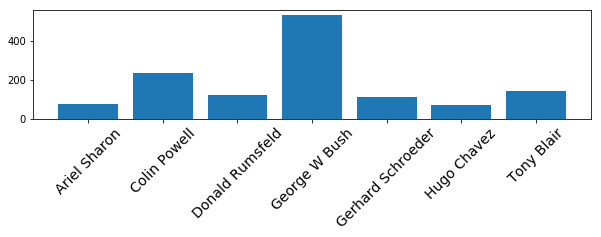

In [33]:
# Definindo o tamanho da área de plotagem
plt.figure(figsize=(10, 2))
# Capturando valores únicos da variável y
unique_targets = np.unique(dataset_faces.target)
# Contando o total de cada y
counts = [(dataset_faces.target == i).sum() for i in unique_targets]

# Plot
plt.xticks(unique_targets, dataset_faces.target_names[unique_targets])
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45, size = 14)
_ = plt.bar(unique_targets, counts)

#### Split do Dataset para treino e teste

In [35]:
X_treino, X_teste, y_treino, y_teste = train_test_split(dataset_faces.data, dataset_faces.target, random_state = 0)

In [36]:
print(X_treino.shape, X_teste.shape)

((966L, 1850L), (322L, 1850L))


- Para treino temos 966 imagens e 1850 atributos, ou pixels das imagens.


- Para teste temos 322 imagens e 1850 atributos, ou pixels das imagens.

#### Pré-Processamento: Principal Component Analysis (PCA)
Os 1850 atributos representam 1850 dimensões, o que é muito para modelos SVM. Podemos usar o PCA para reduzir esses recuros de 1850 a um nível gerenciável matendo a maioria das informações no Dataset.

In [37]:
# Criando o modelo PCA com 150 componentes
pca = decomposition.PCA(n_components = 150,
                       whiten = True,
                       svd_solver = 'randomized')

In [38]:
# Treinando o modelo PCA somente com os dados de treino
pca.fit(X_treino)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [39]:
# Aplicando PCA nos dados de treino e teste
X_treino_pca = pca.transform(X_treino)
X_teste_pca = pca.transform(X_teste)

In [40]:
# Dimensões 
print(X_treino_pca.shape)
print(X_teste_pca.shape)

(966L, 150L)
(322L, 150L)


Esses 150 componentes correspondem a fatores em uma combinação linear de imagens de modo que a combinação se aproxime da face original. Em geral, o PCA pode ser uma técnica poderosa de pré-processamento que pode melhorar significativamente o desempenho da classificação.

#### Construindo o Modelo de Machine Learning com SVM

In [42]:
# Criando o modelo
modelo_svm = svm.SVC(C = 5, gamma = 0.001)

In [43]:
# Treinando o modelo
modelo_svm.fit(X_treino_pca, y_treino)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Avaliação do Modelo

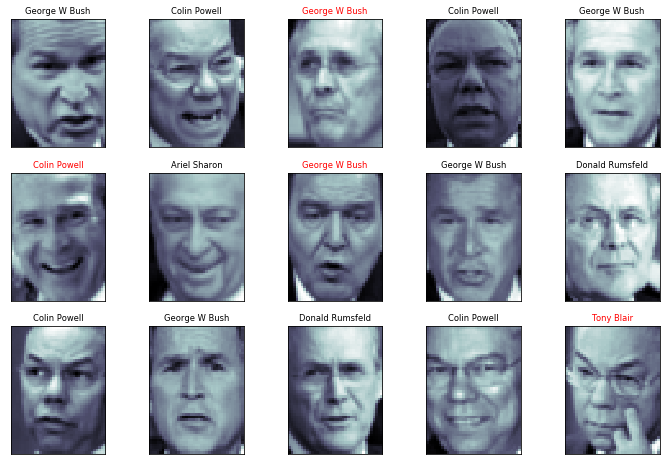

In [44]:
# Tamanho da área de plotagem
fig = plt.figure(figsize = (12, 8))

# Loop por 15 imagens
for i in range(15):
    
    # Subplots
    ax = fig.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
    
    # Mostra a imagem real no dataset de teste
    ax.imshow(X_teste[i].reshape((50, 37)), cmap = plt.cm.bone)
    
    # Faz a previsão de classe com o modelo treinado
    y_pred = modelo_svm.predict(X_teste_pca[i].reshape(1,-1))[0]
    
    # Se a previsão de classe for igual a classe real, colocamos o nome em preto, se não em vermelho
    # Nome em vermelho significa erro do modelo
    color = 'black' if y_pred == y_teste[i] else 'red'
    
    # Define o título
    ax.set_title(dataset_faces.target_names[y_pred], fontsize = 'small', color = color)

Observando as imagens, nomes em vermelho representam erro do modelo.

In [45]:
print(modelo_svm.score(X_teste_pca, y_teste))

0.8385093167701864


O modelo tem uma eficiência de aproximadamente 84%, ou seja, a cada 100 imagens, acerta a previsão em 84 casos.

#### Fim